## UK ECOMM SALES ANALYSIS
       By: Elsie Kafui Funkor

### TABLE OF CONTENT:

1. [Problem Statement](#-Problem-Statement) 

2. [Objectives](#-Objectives)

3. [Business Questions](#-Business-Questions)

4. [Importation of Libraries and Packages](#-Importation-of-Libraries-and-Packages)

5. [Data Importation](#-Data-Importation)

6. [Data Cleaning and Validation](#-Data-Cleaning-and-Validation)

7. [Filtering for UK Data](#-Filtering-for-UK-Data)

8. [Feature Engineering](#-Feature-Engineering)

9. [Exploratory Data Analysis (Bivariate and Univaiate)](#-Exploratory-Data-Analysis-(Bivariate-and-Univaiate)

10. [Conclusion](#-Conclusion)

11. [Recommendation](#-Recommendation)


### PROBLEM STATEMENT
    ***This project relates to the United Kingdom only

    A leading retail company has reached out to us to help them make some data-driven decisions to help grow and differentiate their business. As part of this need, the CEO of the company has shared some of their transactional data to help with this discovery process. He has questions about what types of items should be placed close together on shelves for shelf optimization, some major items that should be ordered ahead of time, a forecast of revenue for the next year, what type of items should they run promotions on, and why. He’ll also appreciate any additional data-driven insights you can share to give them a competitive edge.

    As a data scientist assigned to this client to help with this task, kindly prepare a presentation outlining your findings and insights to the CEO. You'll also be required to host a technical session with the Data Science team of the company to share your methodology, code, and thinking process. Please bear in mind that they were skeptical about the CEO outsourcing this project to you so be prepared to share and explain your approaches.

### OBJECTIVE

    1. Identify optimal product placements on shelves to improve sales and customer experience.
    2. Determine major items that should be ordered in advance to maintain inventory efficiency.
    3. Forecast the company's revenue for the upcoming year.
    4. Recommend types of items for promotional activities and provide the reasoning behind these recommendations.
    5. Offer additional data-driven insights to help the company gain a competitive advantage in the market.

   ### **BUSINESS QUESTIONS**
    1. How many items are there?
    2. What are the most purchased items?
    3. What are the least purchased items?
    4. How many customers are there?
    5. Who are the top customers and what do they patronise?
    6. On what days of the week are most sales made?
    7. At what time of the day are the most sales made?

## IMPORTATION OF LIBRARIES AND PACKAGES

In [ ]:
# Data Handling
from datetime import datetime, date
import numpy as np
import pandas as pd
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

# Other Packages
import warnings
warnings.filterwarnings("ignore")

 ## DATA IMPORTATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Zach Levi and Associates/data.csv', parse_dates = ['InvoiceDate'],encoding = 'latin1' )

In [ ]:
data.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France


## DATA CLEANING AND VALIDATION

### Column names

In [ ]:
for columns in data.columns:
    print(columns)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [ ]:
# Changing the column names to increase legibility
data.rename(columns= {'InvoiceNo':'Invoice Number','StockCode':'Stock Code','Description':'Item Description',\
                      'InvoiceDate':'Timestamp','UnitPrice':'Unit Price','CustomerID':'Customer ID'}, inplace = True)

In [ ]:
for col in data.columns:
    print(col)

Invoice Number
Stock Code
Item Description
Quantity
Timestamp
Unit Price
Customer ID
Country


In [ ]:
data.isna().sum()

Invoice Number           0
Stock Code               0
Item Description      1454
Quantity                 0
Timestamp                0
Unit Price               0
Customer ID         135080
Country                  0
dtype: int64

### Data types contained in columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice Number    541909 non-null  object        
 1   Stock Code        541909 non-null  object        
 2   Item Description  540455 non-null  object        
 3   Quantity          541909 non-null  int64         
 4   Timestamp         541909 non-null  datetime64[ns]
 5   Unit Price        541909 non-null  float64       
 6   Customer ID       406829 non-null  float64       
 7   Country           541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data = data.astype({'Customer ID':object})

In [ ]:
# Ascertaining changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice Number    541909 non-null  object        
 1   Stock Code        541909 non-null  object        
 2   Item Description  540455 non-null  object        
 3   Quantity          541909 non-null  int64         
 4   Timestamp         541909 non-null  datetime64[ns]
 5   Unit Price        541909 non-null  float64       
 6   Customer ID       406829 non-null  object        
 7   Country           541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


### Unique values per category

In [ ]:
data.nunique()

Invoice Number      25900
Stock Code           4070
Item Description     4223
Quantity              722
Timestamp           23260
Unit Price           1630
Customer ID          4372
Country                38
dtype: int64

##### Stock code has 4,070 unique values while Item Description has 4,223. Each stock code should relate to an item description, what is causing the disparity?

In [ ]:
# There are 38 countries but the study is only focused on the UK.
# Checking data to ensure that the united kingdom is not represented in another way within the columns
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## Filtering for only UK Data

In [ ]:
uk_retail = data[data['Country'] == 'United Kingdom']

In [ ]:
uk_retail.head(10)

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


 ### Checking for unique values within columns

In [ ]:
uk_retail.nunique()

Invoice Number      23494
Stock Code           4065
Item Description     4202
Quantity              715
Timestamp           21220
Unit Price           1574
Customer ID          3950
Country                 1
dtype: int64

 ##### The data is from the United Kingdom only and it contains 23,494 distinct sales to 3,950 different customers.

### Data Types contained in the columns of UK_Retail Data

In [ ]:
uk_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice Number    495478 non-null  object        
 1   Stock Code        495478 non-null  object        
 2   Item Description  494024 non-null  object        
 3   Quantity          495478 non-null  int64         
 4   Timestamp         495478 non-null  datetime64[ns]
 5   Unit Price        495478 non-null  float64       
 6   Customer ID       361878 non-null  object        
 7   Country           495478 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 34.0+ MB


### Checking for Null Values

In [ ]:
uk_retail.isna().sum()

Invoice Number           0
Stock Code               0
Item Description      1454
Quantity                 0
Timestamp                0
Unit Price               0
Customer ID         133600
Country                  0
dtype: int64

##### There are 133,600 rows with missing Customer ID's and 1,454 rows with missing item descriptions
##### The null values are found in Customer ID and Item Description columns which both contain categorical data

###Fill null Item Description Values

In [ ]:
from collections import Counter
missing_descriptions = uk_retail[uk_retail['Item Description'].isna()][['Stock Code']].drop_duplicates()
all_desc = uk_retail[~uk_retail['Item Description'].isna()][['Stock Code', 'Item Description']]

def get_desc(gr):
    c = Counter(gr['Item Description'].values)
    return c.most_common(1)[0][0]
new_desc = all_desc.groupby('Stock Code').apply(get_desc)

for stock in new_desc.index.values:
    uk_retail.loc[uk_retail['Stock Code']==stock, 'Item Description'] = new_desc.loc[stock]

In [ ]:
uk_retail.isna().sum()

Invoice Number           0
Stock Code               0
Item Description       115
Quantity                 0
Timestamp                0
Unit Price               0
Customer ID         133600
Country                  0
dtype: int64

### Summary Statistics of UK_Retail Data

In [ ]:
uk_retail.describe()

,Quantity,Timestamp,Unit Price
count,495478.000000,495478,495478.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-27 12:06:00,1.250000
50%,3.000000,2011-07-19 11:47:00,2.100000
75%,10.000000,2011-10-20 10:41:00,4.130000
max,80995.000000,2011-12-09 12:49:00,38970.000000
std,227.588756,NaN,99.315438


##### The minimum quantity is -80,995 and the highest is 80,995. The minimum unit price is -11062.06 and the highest is 38,970

In [ ]:
uk_retail.describe(include = object)

,Invoice Number,Stock Code,Item Description,Customer ID,Country
count,495478,495478,495363,361878.0,495478
unique,23494,4065,3815,3950.0,1
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,1114,2215,2282,7983.0,495478


### Dropping duplicates

In [ ]:
uk_retail.duplicated().sum()

5180

In [ ]:
uk_retail = uk_retail.drop_duplicates()

In [ ]:
uk_retail.duplicated().sum()

0

### Inspecting negative unit price and quantity data

#### Unit Price Data

In [ ]:
uk_retail[uk_retail['Unit Price']<0]

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


##### The above are non-sales related and will therefore be dropped

In [ ]:
# Dropping negative unit price values
price_under_zero = uk_retail[uk_retail['Unit Price']<0].index
uk_retail=uk_retail.drop(price_under_zero)
uk_retail

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
# Making sure the rows have been removed
uk_retail[uk_retail['Unit Price']<0]

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country


### Resolve Zero Unit Prices

In [ ]:
uk_retail[uk_retail['Unit Price']==0]

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [ ]:
zero_unit_priced_stock = uk_retail[uk_retail['Unit Price'] <= 0.0]\
['Stock Code'].drop_duplicates()
stock_unit_price = uk_retail[uk_retail['Unit Price'] != 0].groupby('Stock Code').agg({'Unit Price': [max, min, 'mean']})
stock_unit_price.columns = ["_".join(x) for x in stock_unit_price.columns.ravel()]
for stock in zero_unit_priced_stock.values:
    if stock in stock_unit_price.index.values:
        uk_retail.loc[(uk_retail['Stock Code'] == stock) & (uk_retail['Unit Price'] == 0), 'Unit Price'] = stock_unit_price.loc[stock, 'Unit Price_mean'].round(2)

In [ ]:
uk_retail[uk_retail['Unit Price']==0]

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom
431380,573595,79323S,"Unsaleable, destroyed.",-674,2011-10-31 15:17:00,0.0,NaN,United Kingdom
431382,573597,79341,"Unsaleable, destroyed.",-905,2011-10-31 15:18:00,0.0,NaN,United Kingdom
431383,573598,79342B,"Unsaleable, destroyed.",-1128,2011-10-31 15:18:00,0.0,NaN,United Kingdom


In [ ]:
uk_retail[uk_retail['Unit Price'] == 0.0]['Customer ID'].reset_index()

,index,Customer ID
0,1970,NaN
1,1971,NaN
2,1987,NaN
3,1988,NaN
4,2024,NaN
...,...,...
134,431378,NaN
135,431380,NaN
136,431382,NaN
137,431383,NaN


All the remaining zero Unit Prices have no customer ID's.

In [ ]:
uk_retail[uk_retail['Unit Price'] <= 0.0]['Item Description'].value_counts(dropna=False).reset_index()

,Item Description,count
0,NaN,115
1,"Unsaleable, destroyed.",6
2,thrown away,5
3,ebay,3
4,adjustment,2
5,damages,1
6,throw away,1
7,thrown away-can't sell.,1
8,thrown away-can't sell,1
9,Thrown away-rusty,1


#####The remaining zero prices seem to consist of items which cannot be sold (except TRAVEL CARD WALLET DOTCOMGIFTSHOP and PADS TO MATCH ALL CUSHIONS which seem to have been given for free) and items with no description. Also all these transactions have no Customer ID's. This means that they neither contribute to the sales value nor give information on the buying practices of customers. These will be dropped.

In [ ]:
# Dropping unit price = 0
price_zero = uk_retail[uk_retail['Unit Price']==0].index
uk_retail=uk_retail.drop(price_zero)

In [ ]:
uk_retail[uk_retail['Unit Price']==0]

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country


### FEATURE ENGINEERING

### Creating a Sales column

In [ ]:
uk_retail['Sales'] = (uk_retail['Unit Price'])*(uk_retail['Quantity'])

In [ ]:
uk_retail

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


### Extracting time, date, day of the week and month

In [ ]:
# Time
uk_retail['Invoice Time'] = uk_retail['Timestamp'].dt.time
# Date
uk_retail['Invoice Date'] = uk_retail['Timestamp'].dt.date
# Day of the week
uk_retail['Day of the week'] = uk_retail['Timestamp'].dt.day_name()
# Month
uk_retail['Month'] = uk_retail['Timestamp'].dt.month_name()
# Year
uk_retail['Year'] = uk_retail['Timestamp'].dt.year

In [ ]:
uk_retail.head(20)

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country,Sales,Invoice Time,Invoice Date,Day of the week,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,08:26:00,2010-12-01,Wednesday,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12-01,Wednesday,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,08:26:00,2010-12-01,Wednesday,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12-01,Wednesday,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12-01,Wednesday,December,2010
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,08:26:00,2010-12-01,Wednesday,December,2010
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,08:26:00,2010-12-01,Wednesday,December,2010
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,08:28:00,2010-12-01,Wednesday,December,2010
8,536366,22632,HAND WARMER RED RETROSPOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,08:28:00,2010-12-01,Wednesday,December,2010
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,08:34:00,2010-12-01,Wednesday,December,2010


In [ ]:
uk_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490157 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice Number    490157 non-null  object        
 1   Stock Code        490157 non-null  object        
 2   Item Description  490157 non-null  object        
 3   Quantity          490157 non-null  int64         
 4   Timestamp         490157 non-null  datetime64[ns]
 5   Unit Price        490157 non-null  float64       
 6   Customer ID       356725 non-null  object        
 7   Country           490157 non-null  object        
 8   Sales             490157 non-null  float64       
 9   Invoice Time      490157 non-null  object        
 10  Invoice Date      490157 non-null  object        
 11  Day of the week   490157 non-null  object        
 12  Month             490157 non-null  object        
 13  Year              490157 non-null  int32         
dtypes: dateti

In [ ]:
# Change invoice date to datetime
uk_retail['Invoice Date'] = pd.to_datetime(uk_retail['Invoice Date'])

## Further analysis of data using new set of columns

In [ ]:
uk_retail[uk_retail['Sales']<0].sort_values(by='Sales',ascending=True)

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country,Sales,Invoice Time,Invoice Date,Day of the week,Month,Year
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60,09:27:00,2011-12-09,Friday,December,2011
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,10:17:00,2011-01-18,Tuesday,January,2011
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00,15:31:00,2011-06-10,Friday,June,2011
431381,573596,79323W,WHITE CHERRY LIGHTS,-4830,2011-10-31 15:17:00,6.75,NaN,United Kingdom,-32602.50,15:17:00,2011-10-31,Monday,October,2011
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46,11:36:00,2011-12-05,Monday,December,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199723,C554100,16235,RECYCLED PENCIL WITH RABBIT ERASER,-1,2011-05-22 13:27:00,0.21,15555.0,United Kingdom,-0.21,13:27:00,2011-05-22,Sunday,May,2011
440246,C574524,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,-1,2011-11-04 13:53:00,0.19,17841.0,United Kingdom,-0.19,13:53:00,2011-11-04,Friday,November,2011
329372,C565843,85194S,HANGING SPRING FLOWER EGG SMALL,-1,2011-09-07 12:15:00,0.19,14606.0,United Kingdom,-0.19,12:15:00,2011-09-07,Wednesday,September,2011
72727,C542256,21883,STARS GIFT TAPE,-1,2011-01-26 17:04:00,0.19,17722.0,United Kingdom,-0.19,17:04:00,2011-01-26,Wednesday,January,2011


Since the negative unit price values have been removed, the above dataset represents the negative quantities.
Also all Discount item descriptions have quantities below zero. This makes it easy to investigate discount amounts and during the addition of Sales these will also be deductions of the discounts from the total Sales.

###Null Values in the Customer ID columns

In [ ]:
uk_retail[uk_retail['Sales']<0]

,Invoice Number,Stock Code,Item Description,Quantity,Timestamp,Unit Price,Customer ID,Country,Sales,Invoice Time,Invoice Date,Day of the week,Month,Year
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,09:41:00,2010-12-01,Wednesday,December,2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,09:49:00,2010-12-01,Wednesday,December,2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,10:24:00,2010-12-01,Wednesday,December,2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,10:24:00,2010-12-01,Wednesday,December,2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,10:24:00,2010-12-01,Wednesday,December,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,09:57:00,2011-12-09,Friday,December,2011
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,10:28:00,2011-12-09,Friday,December,2011
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,11:57:00,2011-12-09,Friday,December,2011
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,11:58:00,2011-12-09,Friday,December,2011


These seem to be some sales as well as item cancellations which have not been assigned customer ID's.
These rows with negative sales values and no customer ID's have no unique values such as invoice numbers or stock codes which connects them to the existing Customers ID's.


What is the Total of sales for the duration?

In [ ]:
# Total Sales
total_sales = uk_retail['Sales'].sum()
print("Total Sales of UK Retail Store for the duration is {}".format(total_sales))

Total Sales of UK Retail Store for the duration is 8617873.304000001


## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

### Sales Distribution

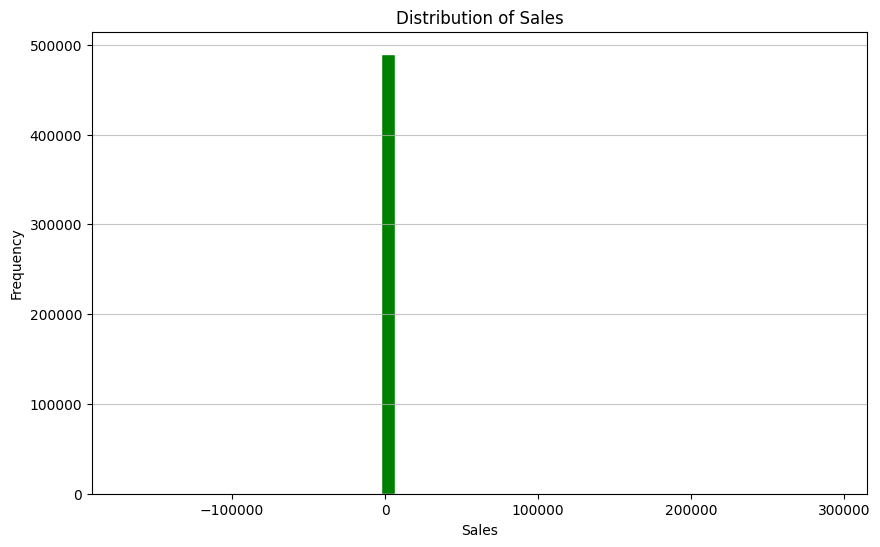

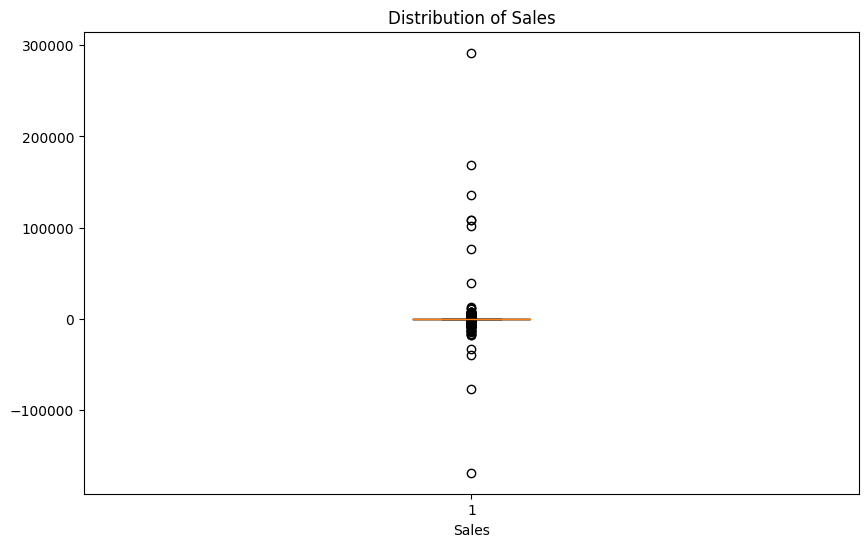

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(uk_retail['Sales'], bins=50, color='green', edgecolor='white')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uk_retail['Sales'])
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.show()

Majority of the sales fall within a certain range represented by the peak of the histogram and the area of high density on the boxplot. As displayed, majority of the sales are in the lower values, and the boxplot shows a lot more outliers in the higher price range than in the negative range.

### Unit Price Distribution

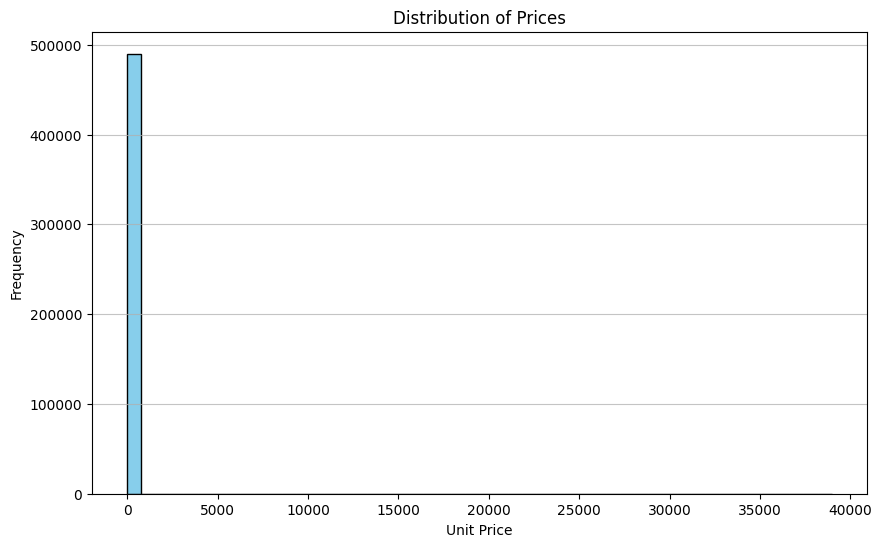

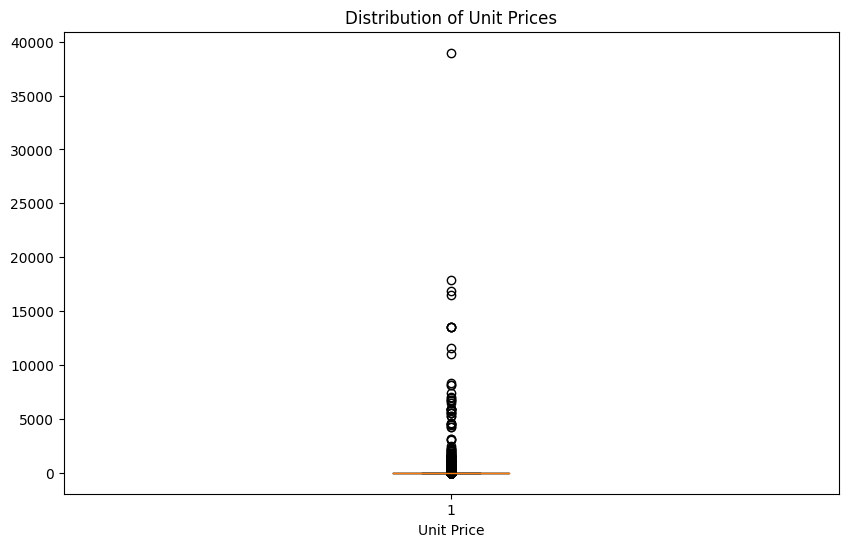

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(uk_retail['Unit Price'], bins= 50,color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uk_retail['Unit Price'])
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.show()



Majority of Unit prices are also found in the lower portion of the prices. Prices are clustered between 0 and 4,000. And the highest price is about 15,000.

### Quantity Distribution

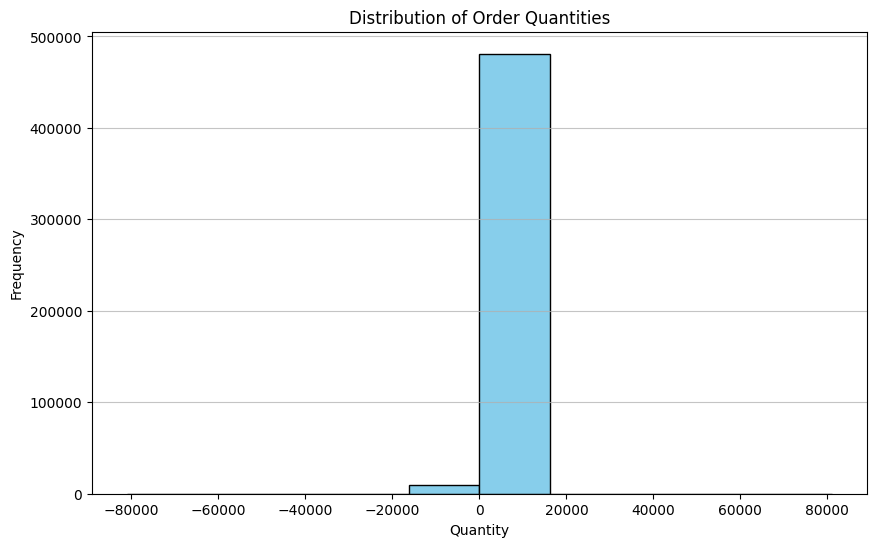

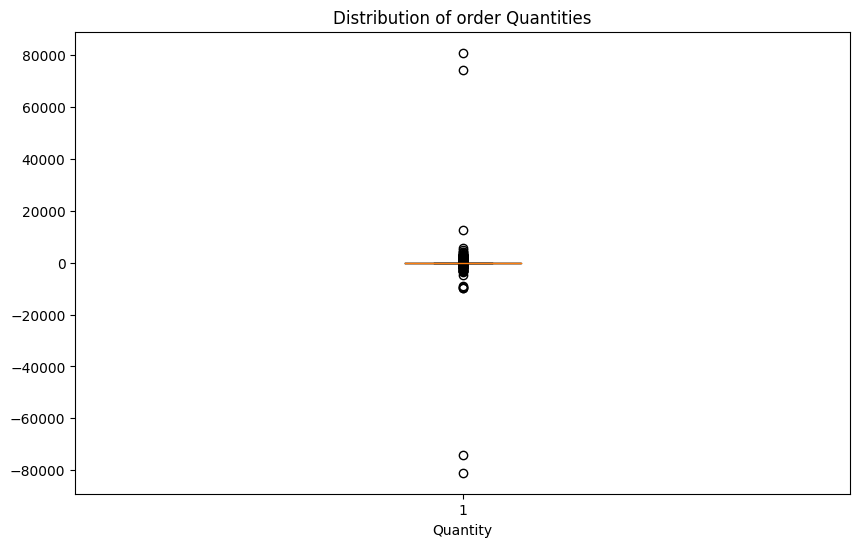

In [ ]:
# Histplot
plt.figure(figsize=(10, 6))
plt.hist(uk_retail['Quantity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(uk_retail['Quantity'])
plt.title('Distribution of order Quantities')
plt.xlabel('Quantity')
plt.show()

### BIVARIATE ANALYSIS

### Sales Trend over Duration

In [ ]:
# Group the data by date and calculate the total sales
daily_sales = uk_retail.groupby('Invoice Date')['Sales'].sum().reset_index()

# Create a time series plot
fig = px.line(daily_sales, x='Invoice Date', y='Sales')
fig.update_layout(title='Trend of Sales Over Time', title_x=0.5)
fig.show()

In [140]:
# Group the data by time and calculate the average sales
day_time_sales = uk_retail.groupby('Invoice Time')['Sales'].mean().reset_index()

# Create a time series plot with slider
fig = px.line(day_time_sales, x='Invoice Time', y='Sales')
fig.update_layout(title='Trend of Average Sales Over Time of Day', title_x=0.5)
fig.show()

In [ ]:
uk_retail.nunique()

Invoice Number      23355
Stock Code           3930
Item Description     3804
Quantity              702
Timestamp           21158
Unit Price           1879
Customer ID          3950
Country                 1
Sales                7354
Invoice Time          768
Invoice Date          305
Day of the week         6
Month                  12
Year                    2
dtype: int64

### Comparing sales of the various days of the week

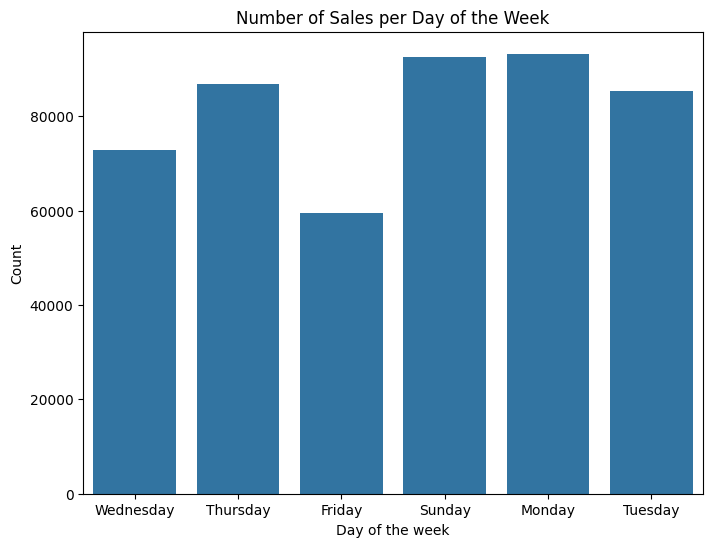

In [ ]:
day_counts = uk_retail['Day of the week'].unique()
daily_sales_counts = uk_retail.groupby('Day of the week')['Sales'].count()

plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts, y=daily_sales_counts.values)
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Number of Sales per Day of the Week')
plt.show()

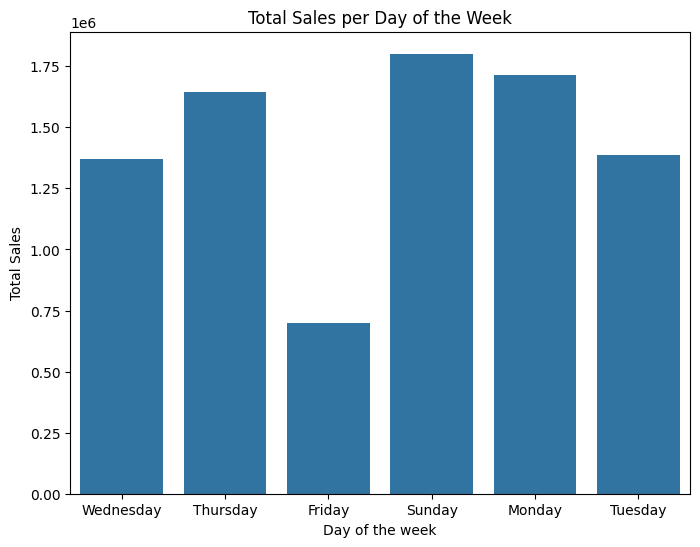

In [ ]:
day_sales = uk_retail['Day of the week'].unique()
daily_sales = uk_retail.groupby('Day of the week')['Sales'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=day_sales, y=daily_sales.values)
plt.xlabel('Day of the week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day of the Week')
plt.show()

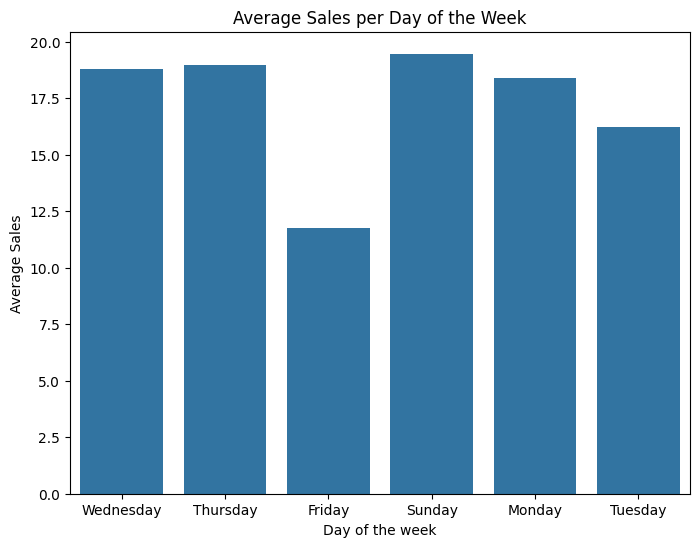

In [ ]:
avg_day_sales = uk_retail['Day of the week'].unique()
avg_daily_sales = uk_retail.groupby('Day of the week')['Sales'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_day_sales, y=avg_daily_sales.values)
plt.xlabel('Day of the week')
plt.ylabel('Average Sales')
plt.title('Average Sales per Day of the Week')
plt.show()

### Comparing sales of the various months of the year

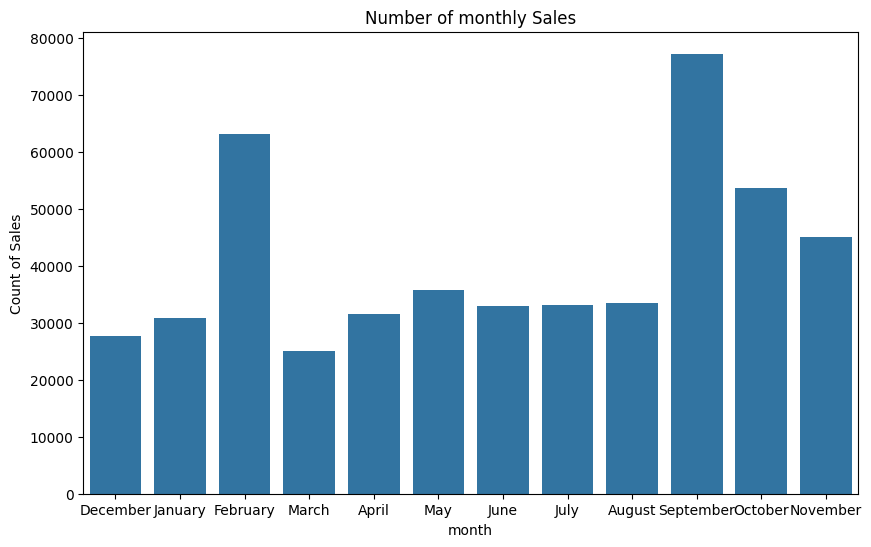

In [ ]:
month_sales = uk_retail['Month'].unique()
monthly_sales_count = uk_retail.groupby('Month')['Sales'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_sales, y=monthly_sales_count.values)
plt.xlabel('month')
plt.ylabel('Count of Sales')
plt.title('Number of monthly Sales')
plt.show()

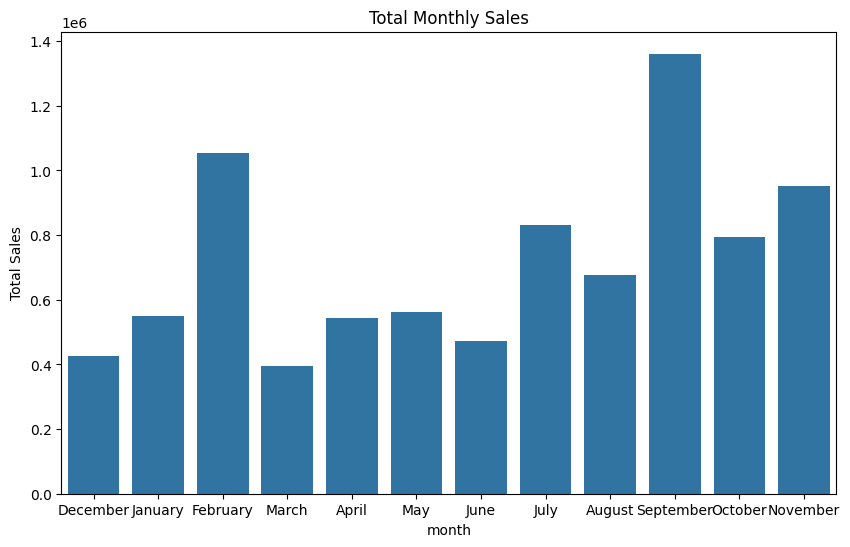

In [ ]:
Total_month_sales = uk_retail['Month'].unique()
Total_monthly_sales = uk_retail.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=Total_month_sales, y=Total_monthly_sales.values)
plt.xlabel('month')
plt.ylabel('Total Sales')
plt.title('Total Monthly Sales')
plt.show()

### Correlation Between Quantity and sales

In [ ]:
uk_retail['Quantity'].corr(uk_retail['Sales'])

0.5500892681896401

In [ ]:
uk_retail['Unit Price'].corr(uk_retail['Sales'])

-0.104176048742056

## BUSINESS QUESTIONS

### Which items need to be ordered in advance for the retail store?

In [ ]:
high_quantity_items = uk_retail.groupby('Item Description')['Quantity'].sum().sort_values(ascending=False).reset_index().head(20)
high_quantity_item = high_quantity_items['Item Description'].tolist()

high_sale_items = uk_retail.groupby('Item Description')['Sales'].sum().sort_values(ascending=False).reset_index().head(20)
high_sale_item = high_sale_items['Item Description'].tolist()

for item in high_sale_item:
  if item in high_quantity_item:
    print(item)

WHITE HANGING HEART T-LIGHT HOLDER
PARTY BUNTING
JUMBO BAG RED RETROSPOT
PAPER CHAIN KIT 50'S CHRISTMAS 
ASSORTED COLOUR BIRD ORNAMENT
POPCORN HOLDER
JUMBO BAG PINK POLKADOT
JUMBO BAG VINTAGE DOILY 
VICTORIAN GLASS HANGING T-LIGHT


These have sales values found in the higher portion outliers of the sales(above 31,000 pounds) and order quantities higher than 16,000

### What are the most purchased items?

In [ ]:
high_patronage_items = uk_retail.groupby('Item Description')['Sales'].count().sort_values(ascending=False).reset_index().head(15)
high_patronage_item=(high_patronage_items['Item Description']).tolist()
high_patronage_item

['WHITE HANGING HEART T-LIGHT HOLDER',
 'JUMBO BAG RED RETROSPOT',
 'REGENCY CAKESTAND 3 TIER',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'POPCORN HOLDER',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'LUNCH BAG  BLACK SKULL.',
 'NATURAL SLATE HEART CHALKBOARD ',
 'LUNCH BAG SUKI DESIGN ',
 'HEART OF WICKER SMALL',
 'JUMBO BAG PINK POLKADOT',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'JUMBO BAG VINTAGE DOILY ']

### What are the least purchased items?

In [126]:
low_patronage_items = uk_retail.groupby('Item Description')['Sales'].count().sort_values(ascending=False).reset_index().tail(10)
low_patronage_item=(low_patronage_items['Item Description']).tolist()
low_patronage_item

['BLOSSOM IMAGES SCRAP BOOK SET',
 'WRAP BLUE RUSSIAN FOLKART',
 'PINK/WHITE GLASS DEMI CHOKER',
 'SET 10 CARD CHRISTMAS STAMPS 16963',
 'RUBY GLASS CLUSTER NECKLACE',
 'LASER CUT MULTI STRAND NECKLACE',
 'WRAP A PRETTY THANK YOU',
 'WRAP  PINK FLOCK',
 'CREAM SWEETHEART TRAYS',
 'LETTER "U" BLING KEY RING']

### How many customers are there?

In [ ]:
num_customers = (uk_retail['Customer ID'].nunique())
print('The retail store has {} customers'.format(num_customers))

The retail store has 3950 customers



### Who are the top customers and what do they patronise?

## Recency, Frequency and Monetary (RFM) Analysis

In [ ]:
# Convert the rest of the null Customer ID's to unknown
uk_retail['Customer ID'] = uk_retail['Customer ID'].fillna("unknown")

In [ ]:
uk_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490157 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice Number    490157 non-null  object        
 1   Stock Code        490157 non-null  object        
 2   Item Description  490157 non-null  object        
 3   Quantity          490157 non-null  int64         
 4   Timestamp         490157 non-null  datetime64[ns]
 5   Unit Price        490157 non-null  float64       
 6   Customer ID       490157 non-null  object        
 7   Country           490157 non-null  object        
 8   Sales             490157 non-null  float64       
 9   Invoice Time      490157 non-null  object        
 10  Invoice Date      490157 non-null  datetime64[ns]
 11  Day of the week   490157 non-null  object        
 12  Month             490157 non-null  object        
 13  Year              490157 non-null  int32         
dtypes: dateti

In [ ]:
uk_retail['Date Today'] = date.today()
uk_retail['Date Today']=pd.to_datetime(uk_retail['Date Today'])
uk_retail['Date Today']

0        2024-04-29
1        2024-04-29
2        2024-04-29
3        2024-04-29
4        2024-04-29
            ...    
541889   2024-04-29
541890   2024-04-29
541891   2024-04-29
541892   2024-04-29
541893   2024-04-29
Name: Date Today, Length: 490157, dtype: datetime64[ns]

In [106]:
uk_retail.isna().sum()

Invoice Number      0
Stock Code          0
Item Description    0
Quantity            0
Timestamp           0
Unit Price          0
Customer ID         0
Country             0
Sales               0
Invoice Time        0
Invoice Date        0
Day of the week     0
Month               0
Year                0
Date Today          0
dtype: int64

In [107]:
function_dictionary = {'Sales':'sum','Date Today':'mean','Invoice Date':'max','Stock Code':'count'}
uk_retail1 = uk_retail.groupby(['Customer ID']).aggregate(function_dictionary)

In [108]:
uk_retail1['Invoice Date']=pd.to_datetime(uk_retail1['Invoice Date'])

In [109]:
#Calculating Recency
uk_retail1['Recency'] = uk_retail1['Date Today'] - uk_retail1['Invoice Date']

In [110]:
# Frequency
frequency_data = uk_retail1.groupby('Customer ID')['Stock Code'].count().reset_index()
frequency_data.rename(columns= {'Stock Code': 'Frequency'}, inplace = True)
uk_retail1 = uk_retail1.merge(frequency_data, on = 'Customer ID', how = 'left')

In [111]:
# Monetary value
monetary_data = uk_retail1.groupby('Customer ID')['Sales'].sum().reset_index()
monetary_data.rename(columns={'Sales': 'MonetaryValue'}, inplace = True)
uk_retail1 = uk_retail1.merge(monetary_data, on = 'Customer ID', how = 'left')
uk_retail1

,Customer ID,Sales,Date Today,Invoice Date,Stock Code,Recency,Frequency,MonetaryValue
0,12346.0,0.00,2024-04-29 00:00:00.000000000,2011-01-18,2,4850 days 00:00:00,1,0.00
1,12747.0,4196.01,2024-04-29 00:00:00.000000000,2011-12-07,103,4527 days 00:00:00,1,4196.01
2,12748.0,28681.86,2024-04-29 00:00:00.000000000,2011-12-09,4459,4525 days 00:00:00,1,28681.86
3,12749.0,3868.20,2024-04-29 00:00:00.000000000,2011-12-06,231,4528 days 00:00:00,1,3868.20
4,12820.0,942.34,2024-04-29 00:00:00.000000000,2011-12-06,59,4528 days 00:00:00,1,942.34
...,...,...,...,...,...,...,...,...
3946,18281.0,80.82,2024-04-29 00:00:00.000000000,2011-06-12,7,4705 days 00:00:00,1,80.82
3947,18282.0,176.60,2024-04-29 00:00:00.000000000,2011-12-02,13,4532 days 00:00:00,1,176.60
3948,18283.0,2045.53,2024-04-29 00:00:00.000000256,2011-12-06,721,4528 days 00:00:00.000000256,1,2045.53
3949,18287.0,1837.28,2024-04-29 00:00:00.000000000,2011-10-28,70,4567 days 00:00:00,1,1837.28


In [112]:
# setting RFM scores
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]
uk_retail1['RecencyScore'] = pd.cut(uk_retail1['Recency'], bins = 5, labels= recency_scores)
uk_retail1['FrequencyScore'] = pd.cut(uk_retail1['Frequency'], bins = 5, labels= frequency_scores)
uk_retail1['MonetaryScore'] = pd.cut(uk_retail1['MonetaryValue'], bins= 5, labels= monetary_scores)

# Converting cores into integers
uk_retail1['RecencyScore'] = uk_retail1['RecencyScore'].astype(int)
uk_retail1['FrequencyScore'] = uk_retail1['FrequencyScore'].astype(int)
uk_retail1['MonetaryScore'] = uk_retail1['MonetaryScore'].astype(int)

In [113]:
uk_retail1['RFM_Score'] = uk_retail1['RecencyScore'] + uk_retail1['FrequencyScore'] + uk_retail1['MonetaryScore']

uk_retail1['RFM Customer Segments'] = ''

uk_retail1.loc[uk_retail1['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Loyal Customers'
uk_retail1.loc[(uk_retail1['RFM_Score'] >= 6) & (uk_retail1['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
uk_retail1.loc[(uk_retail1['RFM_Score'] >= 5) & (uk_retail1['RFM_Score'] < 7), 'RFM Customer Segments'] = 'At-Risk Customers'
uk_retail1.loc[uk_retail1['RFM_Score'] <= 5, 'RFM Customer Segments'] = 'Lost'

####DISTRIBUTION OF SEGMENTS

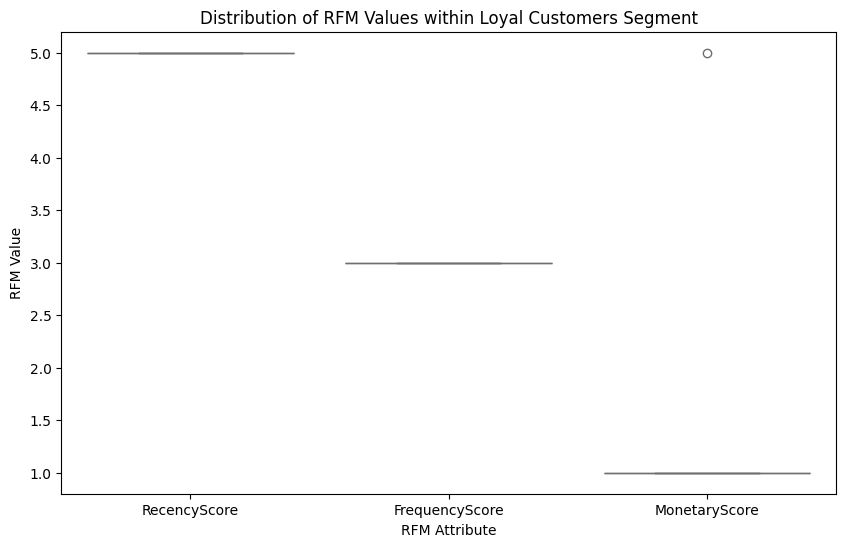

In [114]:
# Loyal Customers segment
loyal_customers_segment = uk_retail1[uk_retail1['RFM Customer Segments'] == 'Loyal Customers']
plt.figure(figsize= (10,6))
sns.boxplot(data = loyal_customers_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']], palette= 'pastel')
plt.title('Distribution of RFM Values within Loyal Customers Segment')
plt.xlabel('RFM Attribute')
plt.ylabel('RFM Value')

plt.show()

The highest performing customers have a recency score of 5, frequency score 3, and monetary scores of 1.

Text(0, 0.5, 'RFM Value')

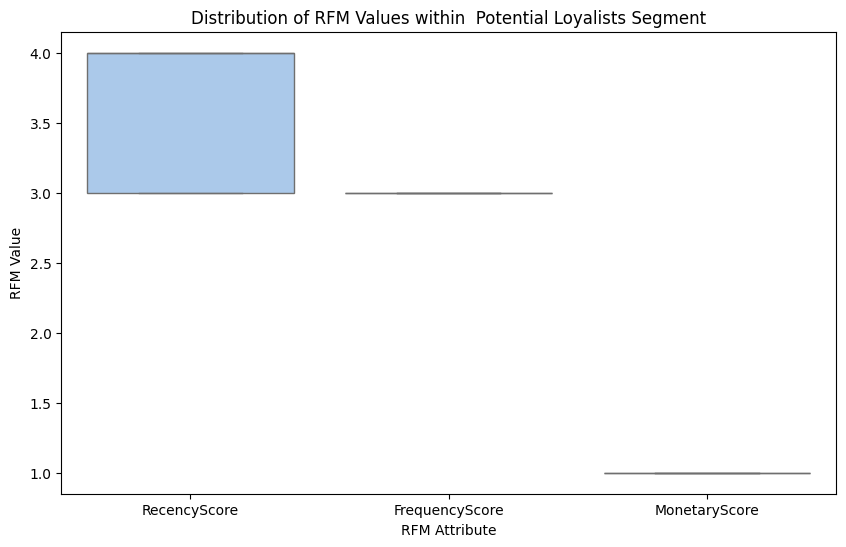

In [115]:
# Potential Loyalists segment
potential_loyalists_segment = uk_retail1[uk_retail1['RFM Customer Segments'] == 'Potential Loyalists']
plt.figure(figsize= (10,6))
sns.boxplot(data = potential_loyalists_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']], palette= 'pastel')
plt.title('Distribution of RFM Values within  Potential Loyalists Segment')
plt.xlabel('RFM Attribute')
plt.ylabel('RFM Value')

Text(0, 0.5, 'RFM Value')

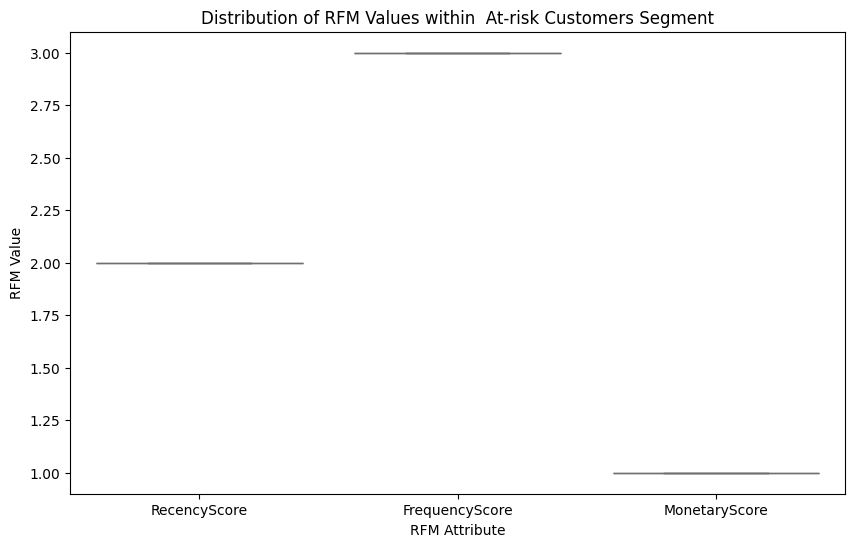

In [116]:
# At-risk Customers segment
arc_segment = uk_retail1[uk_retail1['RFM Customer Segments'] == 'At-Risk Customers']
plt.figure(figsize= (10,6))
sns.boxplot(data = arc_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']], palette= 'pastel')
plt.title('Distribution of RFM Values within  At-risk Customers Segment')
plt.xlabel('RFM Attribute')
plt.ylabel('RFM Value')

Text(0, 0.5, 'RFM Value')

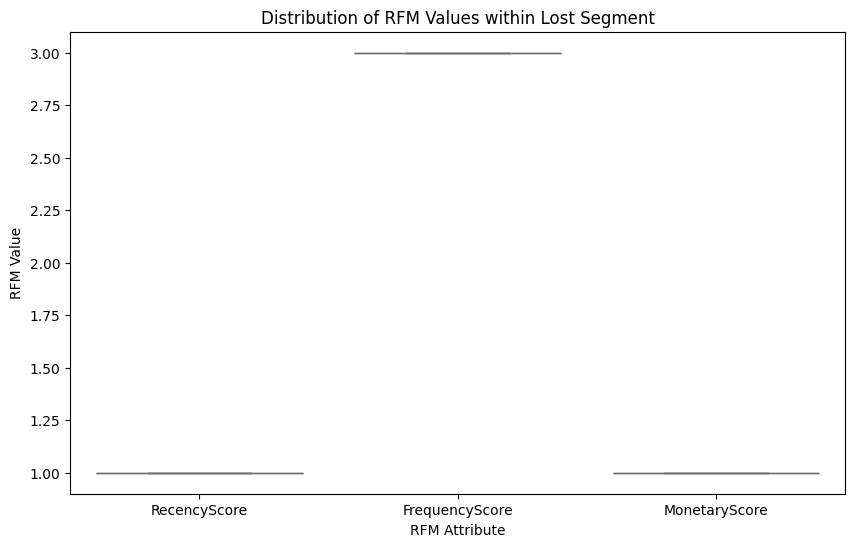

In [117]:
# Lost Customers segment
lost_segment = uk_retail1[uk_retail1['RFM Customer Segments'] == 'Lost']
plt.figure(figsize= (10,6))
sns.boxplot(data = lost_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']], palette= 'pastel')
plt.title('Distribution of RFM Values within Lost Segment')
plt.xlabel('RFM Attribute')
plt.ylabel('RFM Value')

### Segments Comparison

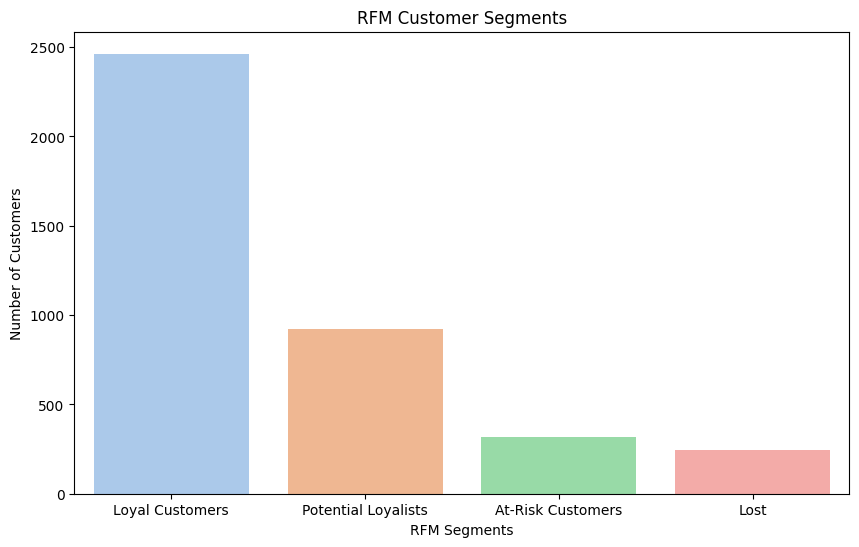

In [125]:
# Distribution of customers over all segments
segment_counts = uk_retail1['RFM Customer Segments'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')
plt.title('RFM Customer Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')
plt.show()

### How many customers does each segment contain

In [137]:
segment_counts

RFM Customer Segments
Loyal Customers        2463
Potential Loyalists     924
At-Risk Customers       319
Lost                    245
Name: count, dtype: int64

###Comparism of Sales by Segments

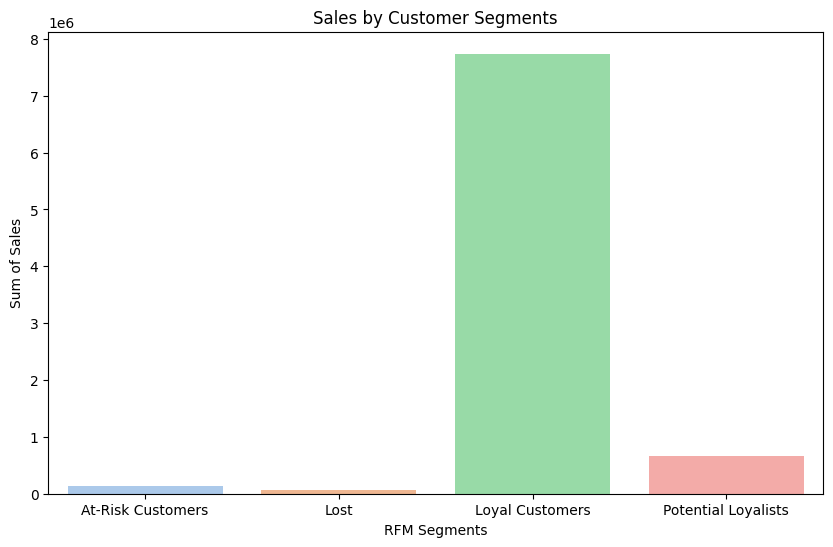

In [139]:
segment_sum = uk_retail1.groupby('RFM Customer Segments')['Sales'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x = segment_sum.index, y=segment_sum.values, palette= 'pastel')
plt.title('Sales by Customer Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Sum of Sales')
plt.show()

### How much sales does each segment generate

In [138]:
segment_sum

RFM Customer Segments
At-Risk Customers       142734.940
Lost                     73289.310
Loyal Customers        7737706.852
Potential Loyalists     664142.202
Name: Sales, dtype: float64

## RECOMMENDATIONS
1. Promotions should be run on less patronized objects
2. Discounts for bulk purchases should be given
3. The retail shop may reward loyal customers with special offers and freebies of the less purchased items.
4. Organize sales at peak times to draw more customers.